<div style="border:solid green 3px; padding: 20px">

<b>Привет!</b>

Меня зовут Сороколетов Илья и я буду проверять твой проект. 

Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)


Для твоего удобства, я буду выделять свои комментарии следующим образом:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>


Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>

<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 

Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху

Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)

P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
    
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

1 Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#размер графиков
sns.set(rc={"figure.figsize":(15, 8)})
#темная тема для графиков
plt.style.use('dark_background')

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой

	pd.set_option('display.max_columns', None)
</div>

Вывели данные на экран для изучения и дальнейшего анализа 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest',
                        'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Молодец! Так датафрейм будет более аккуратным
</div>

Для более красивой картины переименовал некоторые столбцы.

Получили общую информацию по таблице с данными

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around_3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around_3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]]

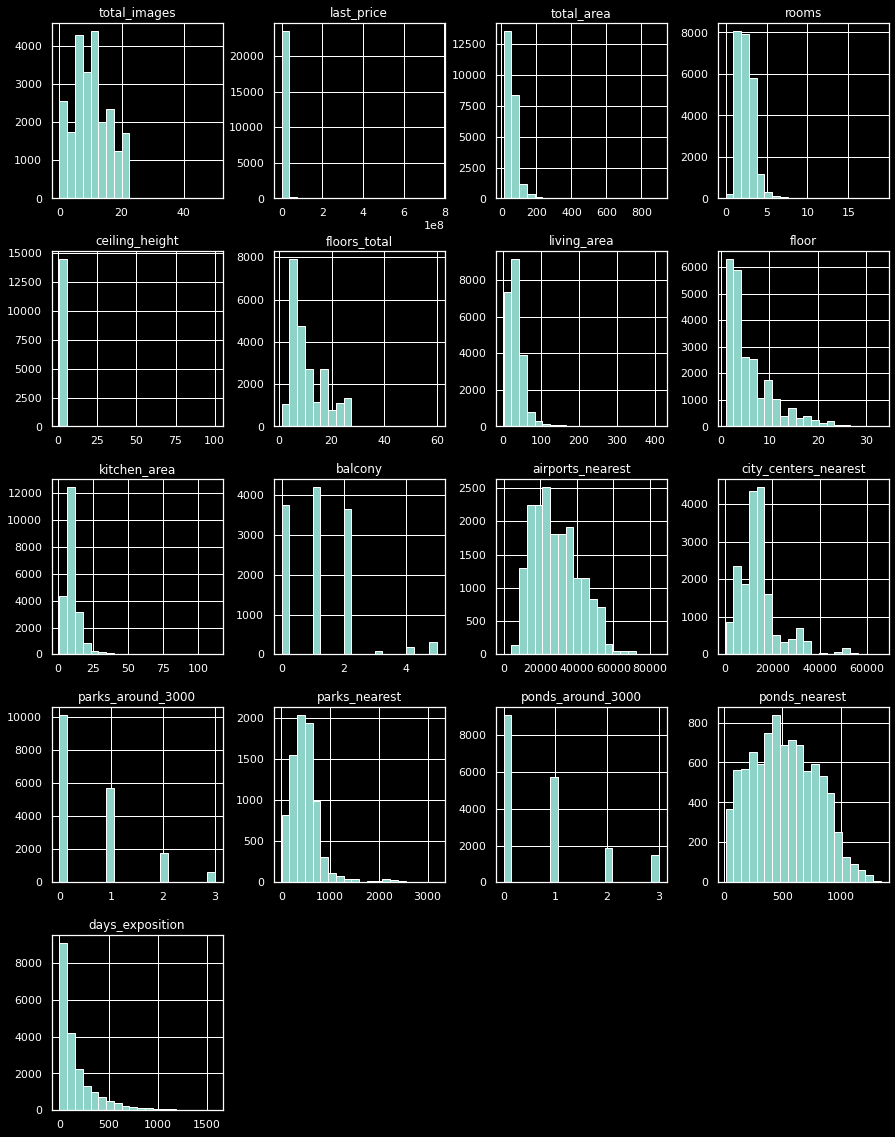

In [7]:
data.hist(bins=20, figsize=(15, 20))

Построили гистограммы по всем числовым столбцам таблицы

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>
		
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)
</div>

### Предобработка данных

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Получили информацию по количеству пропусков в каждом столбце.
1. Высота потолков - почти 30% пропусков, однако заменить чем либо не представляется нужным.
2. Этажность дома - пропусков около 0,3 %, практически не вносит колебание значений по столбцу в целом.
3. Жилая площадь - параметр интересный, пропусков чуть менее 10, однако заменить чем либо не представляется нужным. 
4. Аппартаменты - ооочень много пропусков. Можно предположить, что большая часть пропусков подразумевает обратное - не аппартаменты, поэтому можно заменить на True.
5. Площадь кухни - для многих покупателей немаловажный фактор, по моему мнению данные пропуски (около 10 %) можно заменить средним значением значением (все-таки разброс площади кухни не должен быть значительным).
6. Балкон - почти половина значений отсутствует, вероятно продавец не указал в данном поле ничего в связи с отсутствием балколна. Можно заменить пропуски на 0.
7. Название населенного пункта - пропусков меньше 0,2 %, заменить на что-то не представляется возможным. Надо оставить все как есть.
8. Близость аэропорта - возможно нет аэропорта поблизости. Скорее всего надо оставить эти пропуски без изменений.
9. Близость к центру, количество парков/водоемов в доступности 3000 метров, расстояние до парков/водоемов поблизости,  - немаловажный фактор. Заменить пропуски медианными значениями.
10.  Количество дней публикации объявления = почти 17 %, наверно надо что-то с этим делать, но если честно пока нет мыслей:(.

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(True)

In [10]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].mean())

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>В  таком случае, нужно проверить чтобы площадь кухни не была больше общей. Эти пропуски можно вообще не заполнять
</div>

In [11]:
data['balcony'] = data['balcony'].fillna(0)

In [12]:
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data['city_centers_nearest'].median())

In [13]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(data['parks_around_3000'].median())

In [14]:
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())

In [15]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(data['ponds_around_3000'].median())

In [16]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Пропуски в столбцах с картографическими данными лучше не трогать. Заполняя их таким образом, ты проставляешь одинаковые расстояния до центра (парка, прудов, аэропорта) для разных квартир, хотя они могут быть расположены в разных частях города. Эти пропуски заполнять не нужно
</div>

Заменил пропущенные значения на значения предложенные выше 

In [17]:
data.isna().sum() #проверить результат

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9195
floors_total              86
living_area             1903
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             49
airports_nearest        5542
city_centers_nearest       0
parks_around_3000          0
parks_nearest              0
ponds_around_3000          0
ponds_nearest              0
days_exposition         3181
dtype: int64

In [18]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

все-таки даты дожныбыть датами, а не какими-то там объектами.

In [19]:
data['floors_total'].astype('Int64')

0        16
1        11
2         5
3        14
4        14
         ..
23694     5
23695     5
23696     3
23697    17
23698     5
Name: floors_total, Length: 23699, dtype: Int64

этажей должно быть 1,2,3 и так далее, 10 целых 5 десятых этажа не может быть...

In [20]:
data['balcony'].astype('Int64')

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23699, dtype: Int64

балконы они или есть целиком или их нет совсем. Половины балкона в квартире не бывает. 

In [21]:
data['days_exposition'] = data['days_exposition'].astype('Float64').astype('Int64')

In [22]:
data['days_exposition']

0        <NA>
1          81
2         558
3         424
4         121
         ... 
23694    <NA>
23695      45
23696    <NA>
23697     602
23698    <NA>
Name: days_exposition, Length: 23699, dtype: Int64

десятые доли времени пребывания объявления в обороте наверно никому не нужны.... и нам тоже.

In [23]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [24]:
data['locality_name'].replace('ё', 'е', regex=True)

0            Санкт-Петербург
1             поселок Шушары
2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name, Length: 23699, dtype: object

заменили все 'ё' на 'е'.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

<AxesSubplot:xlabel='rooms'>

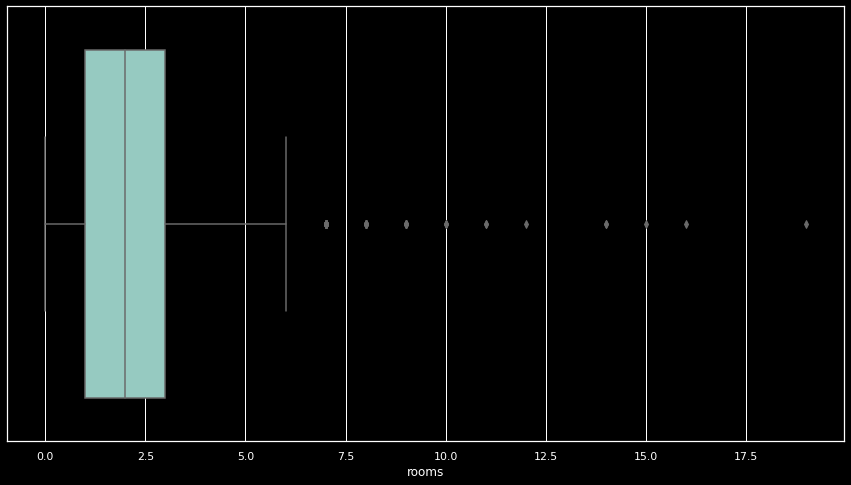

In [25]:
sns.boxplot(x=data['rooms'])

По диаграмме "ящик с усами" выглядит так, что квартиры с количеством комнат больше 6 это вбросы. Проверим количество объявлений с такими квартирами. При этом есть квартиры с количеством комнат 0. Тоже надо проверить. 

In [26]:
len(data[data['rooms'] >= 6])

195

Таких почти процент. Как мне кажется для Питера многокомнатные квартиры не редкость, с учетом перевода комуналок в право владения одним человеком. Попробую отталкиваться от 7 комнат.

In [27]:
len(data[data['rooms'] >= 7])

90

Mеньше половины процента. Пожалуй можно избавиться от таких квартир.

In [28]:
data = data.drop(data[data.rooms > 7].index)

Отмели данные с количеством комнат более 7.

In [29]:
len(data[data['rooms'] == 0])

197

197 квартир бескомнатных квартир. Вроде и немного сравнительно общего количества объявлений (менее процента). Но может это микростудии без комнат, что в современное время не редкость. Пока оставим все как есть, но проверим данное условие.

In [30]:
data.query('rooms==0 & studio == True').reset_index()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,...,10.569807,2.0,посёлок Мурино,NaN,13098.5,0.0,455.0,1.0,502.0,181
1,440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,...,10.569807,2.0,Санкт-Петербург,38171.0,15015.0,0.0,455.0,2.0,982.0,64
2,608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,...,10.569807,0.0,посёлок Шушары,NaN,13098.5,0.0,455.0,1.0,502.0,29
3,697,12,2500000.0,24.10,2017-12-01,0,2.75,25.0,17.50,21,...,10.569807,0.0,деревня Кудрово,NaN,13098.5,0.0,455.0,1.0,502.0,201
4,716,5,1500000.0,17.00,2017-06-07,0,2.70,9.0,12.00,1,...,10.569807,0.0,посёлок Шушары,18654.0,29846.0,0.0,455.0,0.0,502.0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,22867,8,3090000.0,30.00,2017-12-17,0,NaN,25.0,18.20,5,...,10.569807,0.0,Санкт-Петербург,35250.0,16414.0,0.0,455.0,1.0,400.0,211
134,22877,2,4280000.0,28.00,2017-10-26,0,2.70,19.0,18.00,10,...,10.569807,0.0,Санкт-Петербург,18982.0,7206.0,0.0,455.0,1.0,415.0,151
135,23210,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.00,16,...,10.569807,0.0,Санкт-Петербург,11405.0,13222.0,0.0,455.0,1.0,623.0,14
136,23554,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,NaN,8,...,10.569807,0.0,Санкт-Петербург,18090.0,17092.0,0.0,455.0,2.0,112.0,31


138 квартир из 197 соответствует условию, что квартира с количеством комнат 0 это студии. В общем оставим данные без изменений.

<AxesSubplot:xlabel='last_price'>

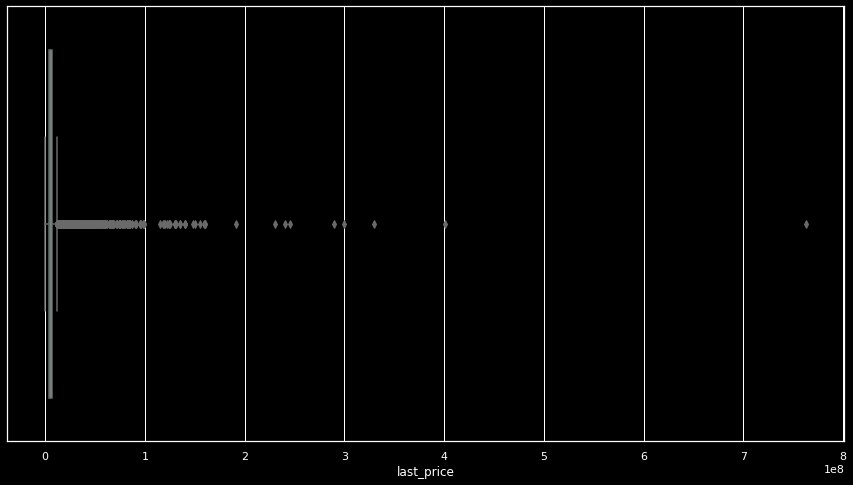

In [31]:
sns.boxplot(x=data['last_price'])

Надо проверить количество квартир со стоимостью более 100 млн. В соответствии с "ящиком с усами" цены выше этой границы выглядят как некоторые аномалии в данных.

In [32]:
len(data[data['last_price'] >= 100000000])

34

Всего 34 квартиры. Глядел на Авито, там такие цены есть. Но в нашем случае это ничтожно малое количество. В утиль!

In [33]:
data = data.drop(data[data.last_price > 100000000].index)

Удалил квартиры с ценой более 100 млн. руб.

In [34]:
data['last_price'].min()

12190.0

а вот это удивительно. Доля в квартире стоит раз в 50 больше (цена начинается примерно с 600 тыс. руб). Надо присмотреться.

In [35]:
len(data[data['last_price'] <= 600000])

44

44 объявления с нереально маленькой ценой. Как-то это не правильно. И немного. Очистим данные от таких объявлений.

In [36]:
data = data.drop(data[data.last_price < 600000].index)

In [37]:
data['total_area'].min()

12.0

Современная студия может иметь и такую маленькую площадь. Пока оставим все как есть.

In [38]:
data['total_area'].max()

517.0

Такие квартиры в Питере есть. Да и в таблице их немного, пока оставим все как есть.

In [39]:
data['living_area'].min()

2.0

Маловато места для проживания. Хотя, возможно, в маленькой студии такое возможно.

In [40]:
data['living_area'].max()

347.5

В квартире площадью 600 с лишним метров такое возможно.

In [41]:
data['kitchen_area'].max()

107.0

Если это кухня-гостинная в огромной квартире, то не исключаю такого. Хотя это больше похоже на кухонный комбинат.

In [42]:
data['kitchen_area'].min()

1.3

Возвращаясь к маленьким студиям, можно предположить что так обозначили кухонную зону.

In [43]:
data['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

Этажность приемлимая для современного строительства.

In [44]:
data['days_exposition'].min()

1

Возможно это отличное предложение и квартира улетела как горячий пирожок.

In [45]:
data['days_exposition'].max()

1580

Более 4-х лет квартиру не могли продать. Настораживает. Год еще куда ни шло. Позже проверим сколько таких квартир.

In [46]:
data['days_exposition'].isna().sum()

3166

Пропусков достаточно много. Заменим на медианное значение.

In [47]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Если тут пропуск, то значит квартира не продана. Эти пропуски заполнять не нужно
</div>

In [48]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   2.79,   2.95,
         4.06,   2.94,   3.54,   3.53,   2.83,   2.4 ,   3.38,   3.01,
         5.6 ,   3.65,   3.9 ,   3.18,   3.35,   2.3 ,   3.57,   2.48,
         2.62,   2.82,   3.98,   2.63,   3.83,   3.52,   3.95,   3.75,
         2.88,   3.67,   3.87,   3.66,   3.86,   4.19,   3.24,   4.8 ,
         4.5 ,   4.2 ,   3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,
         3.09,   8.  ,   3.16,   3.26,   3.34,   2.81,   3.44,   2.97,
      

Изучив уникальные значения высоты потолков сделаю следующие выводы:

 1 Высота потолков ниже 2,4 метра выглядит неразумной.
 
 2 Высота потолков свыше 24 метров возможная ошибка в заполнении данного поля при подаче объявления и надо запятую перенести влево на один знак. Однако надо учитывать, что есть значение 100 м;
 
 3 Высота потолков 8, 8,3, 10,3 20, 22,6 и 100 метров по моему мнению какая-то неправильная и ее можно исключить.
 
 4 Резюмируя вышеизложенное: более нормальными выглядят квартиры с высотой от 2,4 до 6 м, к чему и надо привести таблицу.

In [49]:
data = data.drop(data[data.ceiling_height < 2.4].index)

Избавляемся от значений с высотой потолков менее 2,4 метра.

In [50]:
data = data.drop(data[data.ceiling_height > 60].index)

Избавляемся от значений с высотой потолков более 60 метров.

In [51]:
data = data.drop(data[(data.ceiling_height > 6) & (data.ceiling_height < 24)].index)

Избавляемся от значений с высотой потолков более 6 метров но менее 24 метров.

In [52]:
data.loc[(data['ceiling_height'] >= 24), 'ceiling_height'] = data.loc[(data['ceiling_height'] >= 24), 'ceiling_height'] / 10

Переводим высоту потолков более 24 метров к значениям на порядок ниже. 

In [53]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен с таким решением, так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

Заменим пропущенные значения NaN на медиану.

In [54]:
data['ceiling_height'] = data['ceiling_height'].round(2)

Ну и округлим значения высоты потолков до сантиметров.

In [55]:
data['ceiling_height'].unique()

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 3.4 , 3.06, 2.72,
       2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87, 2.66, 2.59,
       2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.62, 3.12, 2.53,
       2.74, 2.96, 2.46, 2.79, 2.95, 4.06, 2.94, 3.54, 3.53, 2.83, 2.4 ,
       3.38, 3.01, 5.6 , 3.65, 3.9 , 3.18, 3.35, 3.57, 2.48, 2.62, 2.82,
       3.98, 2.63, 3.83, 3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.86,
       4.19, 3.24, 4.8 , 4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09,
       3.16, 3.26, 3.34, 2.81, 3.44, 2.97, 4.37, 2.68, 3.22, 3.27, 4.1 ,
       2.93, 3.46, 3.47, 3.33, 3.63, 3.14, 3.32, 2.98, 2.86, 3.17, 4.4 ,
       3.28, 3.04, 4.45, 5.5 , 3.84, 3.23, 3.02, 3.21, 3.78, 4.3 , 3.39,
       2.69, 3.31, 4.65, 5.3 , 3.56, 3.85, 3.51, 3.93, 3.42, 2.99, 3.49,
       4.14, 2.91, 3.88, 4.25, 3.29, 3.76, 3.69, 4.

Вроде получилось более менее ревлистично.

In [56]:
data = data.reset_index(drop=True)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,455.0,0.0,502.0,81
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,...,10.569807,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121


Итоговая таблица объявлений после обработки.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Диапазоны для аномальных значений подобраны и удалены верно!
</div>

### Посчитайте и добавьте в таблицу новые столбцы

In [58]:
data.insert(3, 'price_per_square_meter', data['last_price'] / data['total_area'])
data.head()

,total_images,last_price,total_area,price_per_square_meter,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,120370.370370,2019-03-07,3,2.70,16.0,51.0,8,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95
1,7,3350000.0,40.4,82920.792079,2018-12-04,1,2.65,11.0,18.6,1,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,455.0,0.0,502.0,81
2,10,5196000.0,56.0,92785.714286,2015-08-20,2,2.65,5.0,34.3,4,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000.0,159.0,408176.100629,2015-07-24,3,2.65,14.0,NaN,9,...,10.569807,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000.0,100.0,100000.000000,2018-06-19,2,3.03,14.0,32.0,13,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121


In [59]:
data['price_per_square_meter'] = data['price_per_square_meter'].round(1)

Добавили столбец с ценой за один квадратный метр и округлили.

In [60]:
data.insert(5, 'day_of_week_exposition', data['first_day_exposition'].dt.weekday)
data.head()

,total_images,last_price,total_area,price_per_square_meter,first_day_exposition,day_of_week_exposition,rooms,ceiling_height,floors_total,living_area,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,120370.4,2019-03-07,3,3,2.70,16.0,51.0,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95
1,7,3350000.0,40.4,82920.8,2018-12-04,1,1,2.65,11.0,18.6,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,455.0,0.0,502.0,81
2,10,5196000.0,56.0,92785.7,2015-08-20,3,2,2.65,5.0,34.3,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000.0,159.0,408176.1,2015-07-24,4,3,2.65,14.0,NaN,...,10.569807,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000.0,100.0,100000.0,2018-06-19,1,2,3.03,14.0,32.0,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121


Добавил столбец с днем недели публикации.

In [61]:
data.insert(6, 'month_exposition', data['first_day_exposition'].dt.month)
data.head()

,total_images,last_price,total_area,price_per_square_meter,first_day_exposition,day_of_week_exposition,month_exposition,rooms,ceiling_height,floors_total,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,120370.4,2019-03-07,3,3,3,2.70,16.0,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95
1,7,3350000.0,40.4,82920.8,2018-12-04,1,12,1,2.65,11.0,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,455.0,0.0,502.0,81
2,10,5196000.0,56.0,92785.7,2015-08-20,3,8,2,2.65,5.0,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000.0,159.0,408176.1,2015-07-24,4,7,3,2.65,14.0,...,10.569807,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000.0,100.0,100000.0,2018-06-19,1,6,2,3.03,14.0,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121


Добавил столбец с месяцем публикации.

In [62]:
data.insert(7, 'year_exposition', data['first_day_exposition'].dt.year)
data.head()

,total_images,last_price,total_area,price_per_square_meter,first_day_exposition,day_of_week_exposition,month_exposition,year_exposition,rooms,ceiling_height,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,120370.4,2019-03-07,3,3,2019,3,2.70,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95
1,7,3350000.0,40.4,82920.8,2018-12-04,1,12,2018,1,2.65,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,455.0,0.0,502.0,81
2,10,5196000.0,56.0,92785.7,2015-08-20,3,8,2015,2,2.65,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000.0,159.0,408176.1,2015-07-24,4,7,2015,3,2.65,...,10.569807,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000.0,100.0,100000.0,2018-06-19,1,6,2018,2,3.03,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121


Добавил столбец с годом публикации.

In [63]:
def t_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [64]:
data['type_floor'] = data.apply(t_floor, axis=1)
data.head()

,total_images,last_price,total_area,price_per_square_meter,first_day_exposition,day_of_week_exposition,month_exposition,year_exposition,rooms,ceiling_height,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,type_floor
0,20,13000000.0,108.0,120370.4,2019-03-07,3,3,2019,3,2.70,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95,другой
1,7,3350000.0,40.4,82920.8,2018-12-04,1,12,2018,1,2.65,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,455.0,0.0,502.0,81,первый
2,10,5196000.0,56.0,92785.7,2015-08-20,3,8,2015,2,2.65,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,другой
3,0,64900000.0,159.0,408176.1,2015-07-24,4,7,2015,3,2.65,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,другой
4,2,10000000.0,100.0,100000.0,2018-06-19,1,6,2018,2,3.03,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,другой


Добавил столбец с типом этажа "первый-последний-другой"

In [65]:
data['city_centers_nearest_km'] = data['city_centers_nearest']/1000
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].round().astype('Int64')

In [66]:
data.head()

,total_images,last_price,total_area,price_per_square_meter,first_day_exposition,day_of_week_exposition,month_exposition,year_exposition,rooms,ceiling_height,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,type_floor,city_centers_nearest_km
0,20,13000000.0,108.0,120370.4,2019-03-07,3,3,2019,3,2.70,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95,другой,16
1,7,3350000.0,40.4,82920.8,2018-12-04,1,12,2018,1,2.65,...,посёлок Шушары,12817.0,18603.0,0.0,455.0,0.0,502.0,81,первый,19
2,10,5196000.0,56.0,92785.7,2015-08-20,3,8,2015,2,2.65,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,другой,14
3,0,64900000.0,159.0,408176.1,2015-07-24,4,7,2015,3,2.65,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,другой,7
4,2,10000000.0,100.0,100000.0,2018-06-19,1,6,2018,2,3.03,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,другой,8


Итоговая таблица после предобработки.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

2 Проведите исследовательский анализ данных

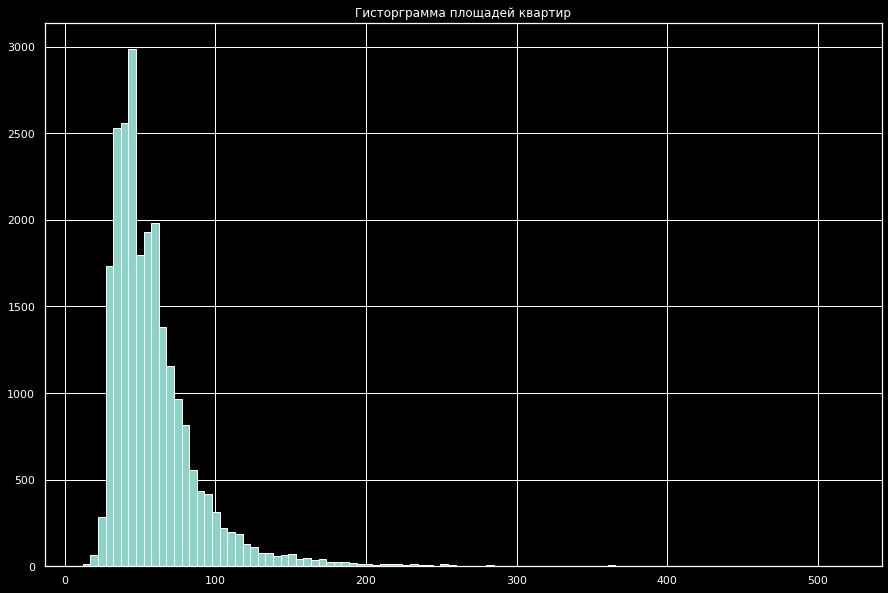

In [67]:
data['total_area'].hist(bins=100, figsize=(15, 10))
plt.title('Гисторграмма площадей квартир')
plt.show()

В целом гистограмма похожа на нормальное распределение. 

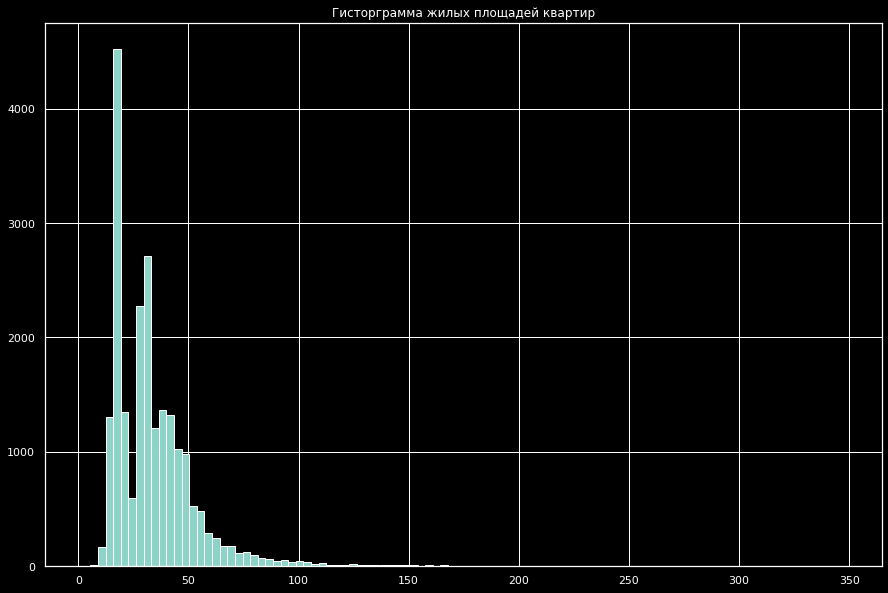

In [68]:
data['living_area'].hist(bins=100, figsize=(15, 10))
plt.title('Гисторграмма жилых площадей квартир')
plt.show()

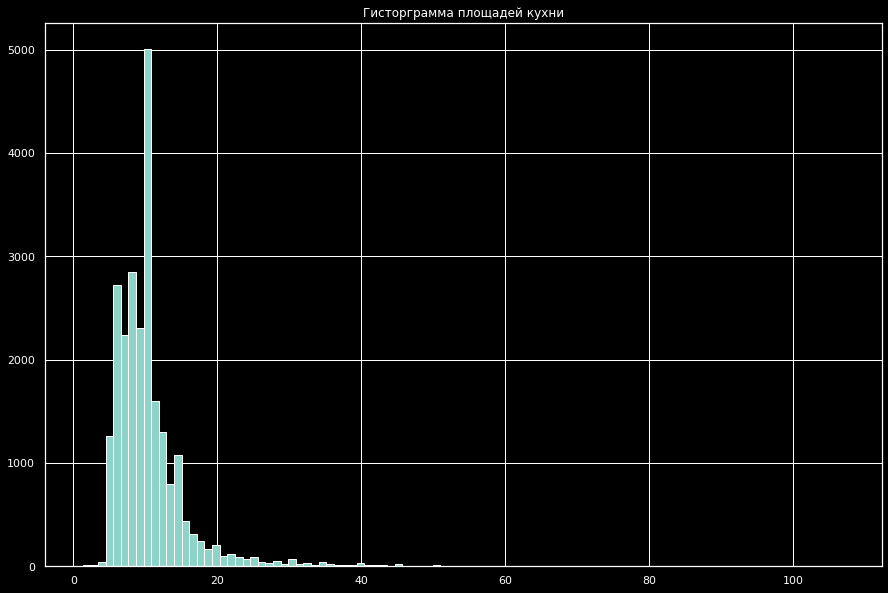

In [69]:
data['kitchen_area'].hist(bins=100, figsize=(15, 10))
plt.title('Гисторграмма площадей кухни')
plt.show()

В целом гистограммы жилой площади и площади кухни выглядят правдоподобно.

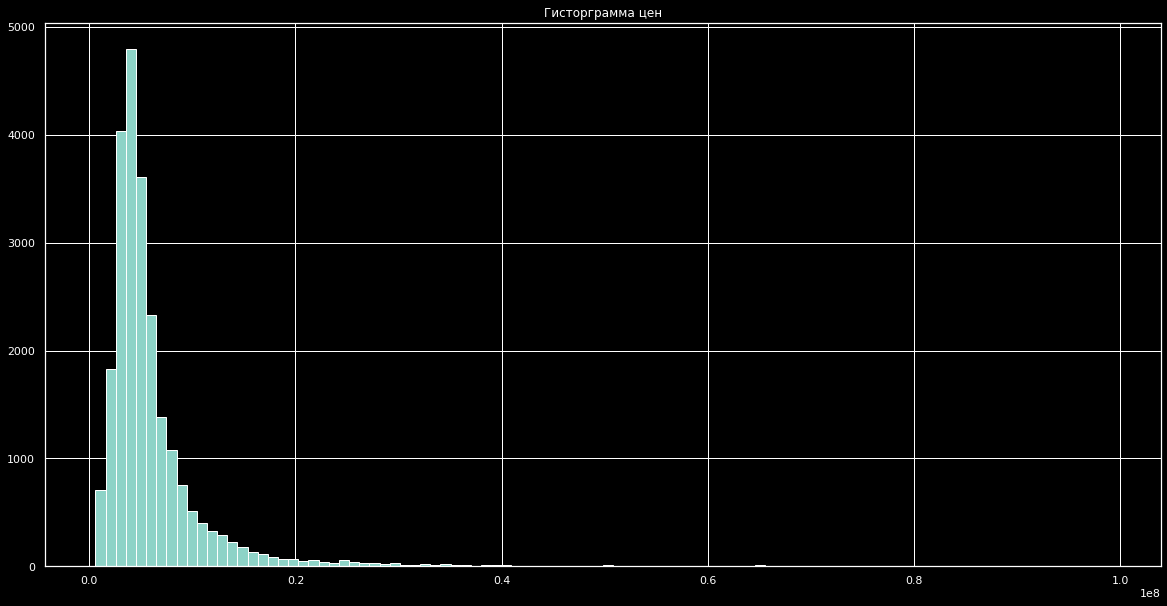

In [70]:
data['last_price'].hist(bins=100, figsize=(20, 10))
plt.title('Гисторграмма цен')
plt.show()

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут можно разделить все значения в столбце last_price на 1 млн, чтобы они пришли в более понятный вид)
</div>

Гистограмма соответствует данным по площадам и достаточно похожа на нормальное распределение.

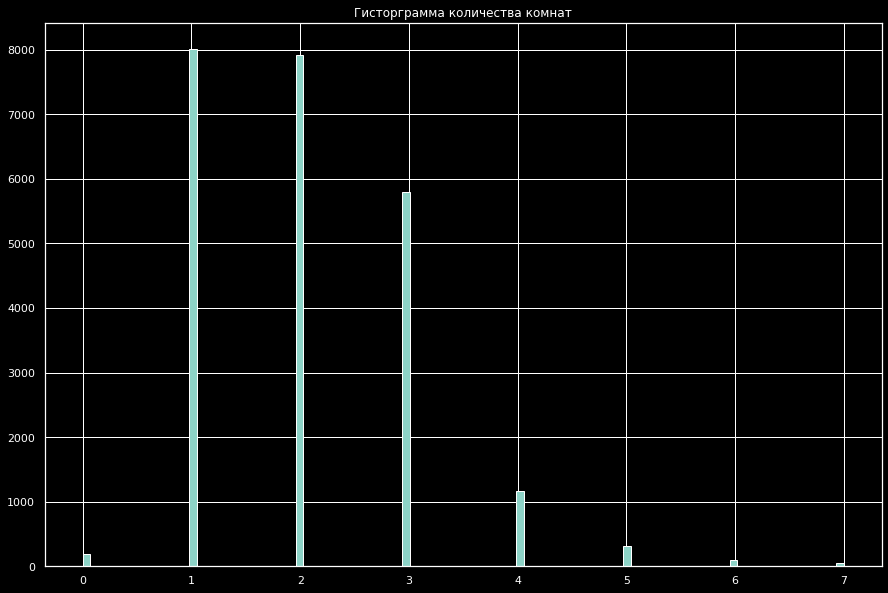

In [71]:
data['rooms'].hist(bins=100, figsize=(15, 10))
plt.title('Гисторграмма количества комнат')
plt.show()

Логично. Самые ходовые квартиры до 3 комнат.

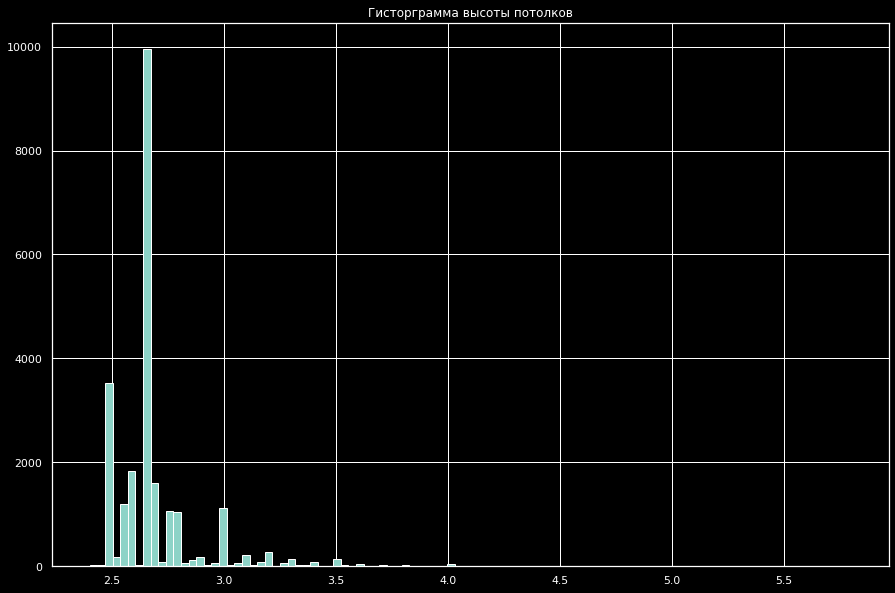

In [72]:
data['ceiling_height'].hist(bins=100, figsize=(15, 10))
plt.title('Гисторграмма высоты потолков')
plt.show()

Выбивается пик в районе высоты потолков 2,5 метра. Но в целом, почему бы такому не быть.

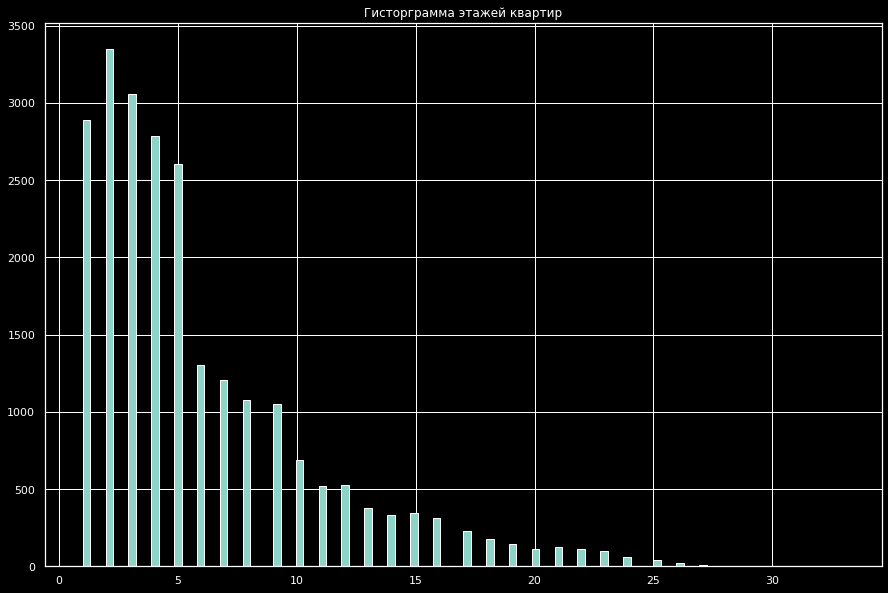

In [73]:
data['floor'].hist(bins=100, figsize=(15, 10))
plt.title('Гисторграмма этажей квартир')
plt.show()

С учетом большого количества 5 и 9 этажных домов все логично.

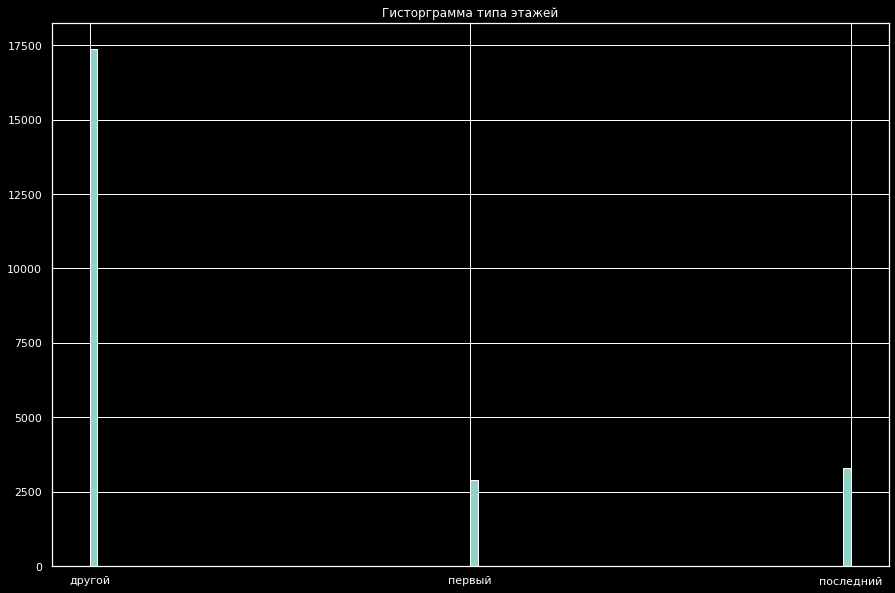

In [74]:
data['type_floor'].hist(bins=100, figsize=(15, 10))
plt.title('Гисторграмма типа этажей')
plt.show()

Чаще продаются не первый и последний этажи.

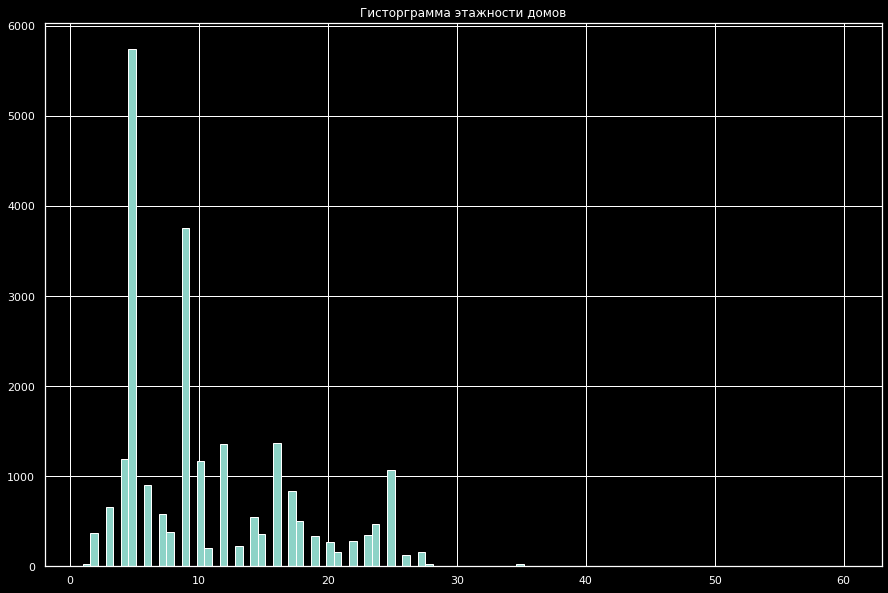

In [75]:
data['floors_total'].hist(bins=100, figsize=(15, 10))
plt.title('Гисторграмма этажности домов')
plt.show()

5 и 9 этажные дома, наследие СССР. Их много по всей стране.

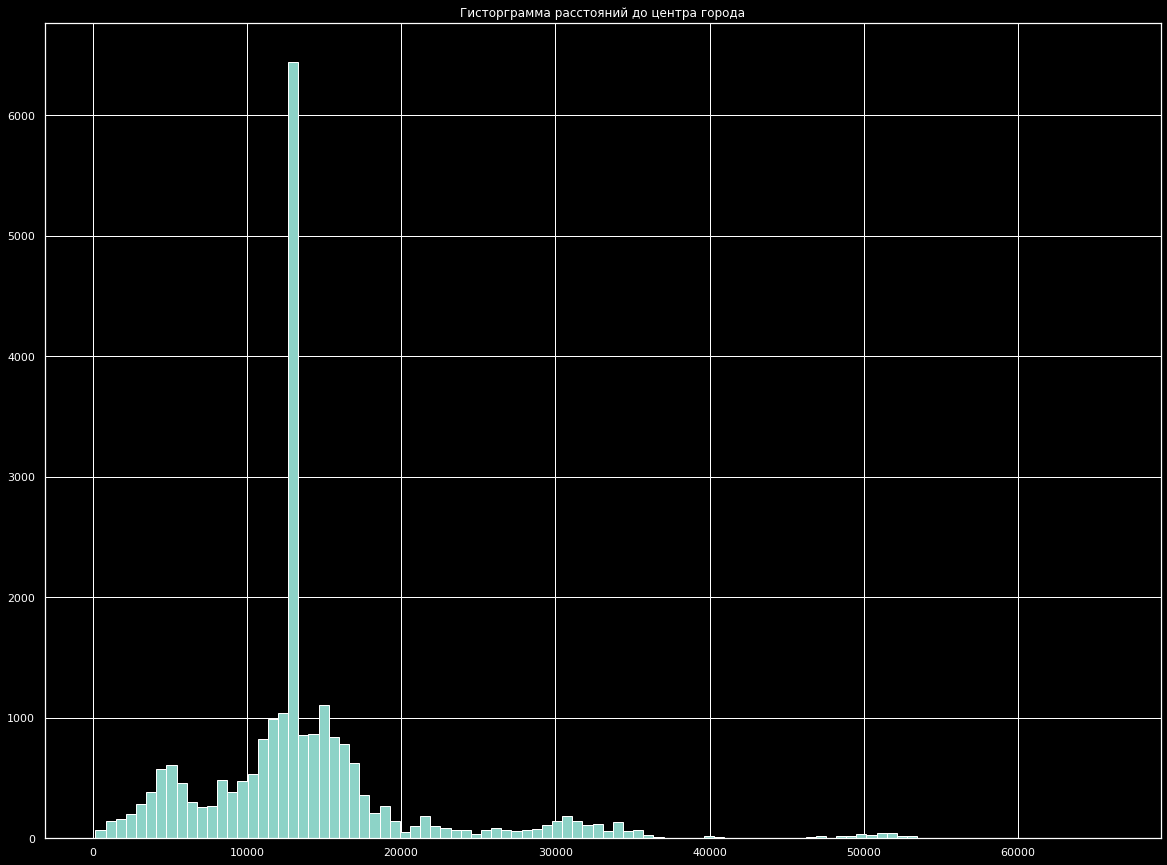

In [76]:
data['city_centers_nearest'].hist(bins=100, figsize=(20, 15))
plt.title('Гисторграмма расстояний до центра города')
plt.show()

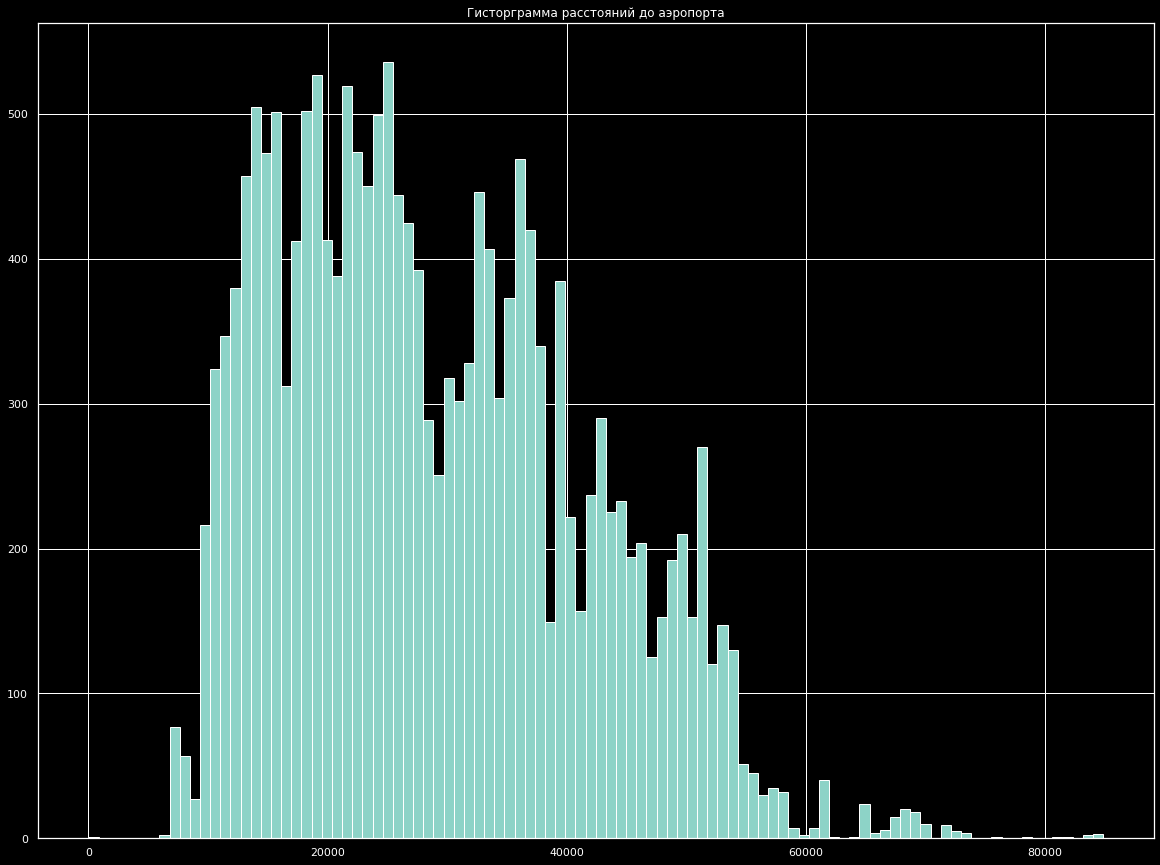

In [77]:
data['airports_nearest'].hist(bins=100, figsize=(20, 15))
plt.title('Гисторграмма расстояний до аэропорта')
plt.show()

Учитывая протяженность Санкт-Петербурга, вполне нормальные показания.

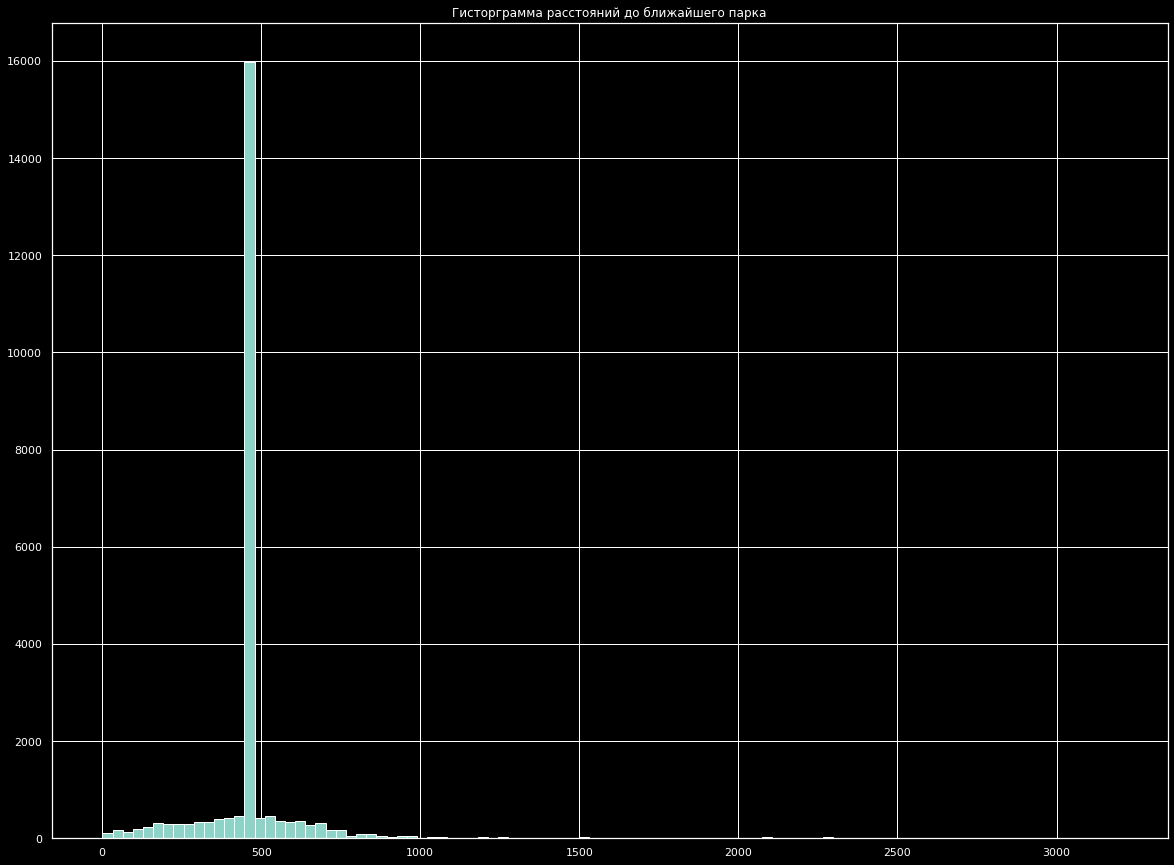

In [78]:
data['parks_nearest'].hist(bins=100, figsize=(20, 15))
plt.title('Гисторграмма расстояний до ближайшего парка')
plt.show()

Парков много, практически большая часть жилья недалеко от них.

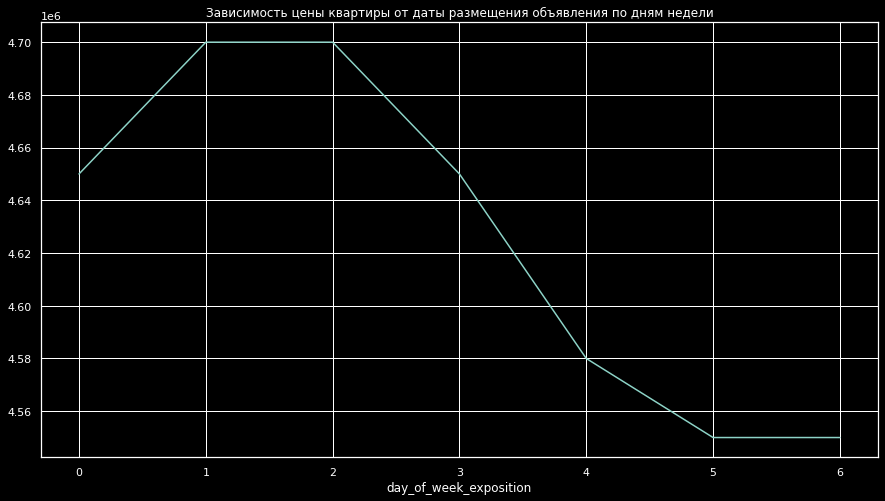

In [79]:
data.groupby('day_of_week_exposition')['last_price'].median().plot()
plt.title('Зависимость цены квартиры от даты размещения объявления по дням недели')
plt.show()

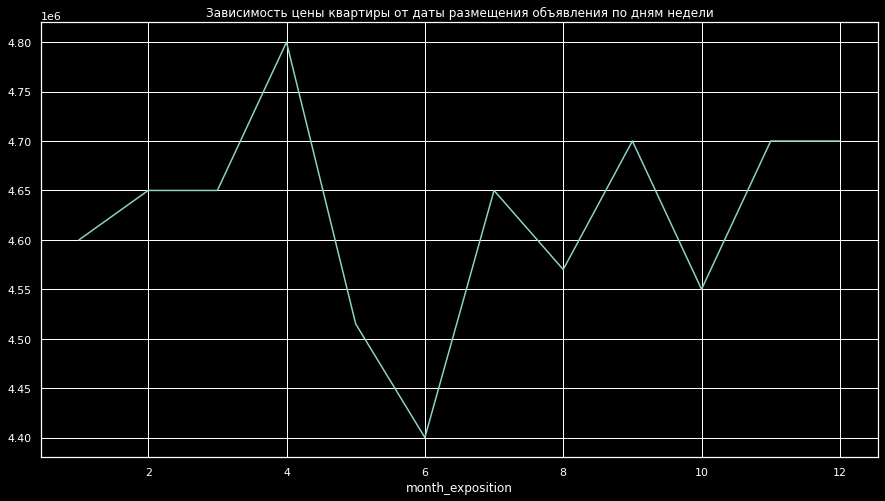

In [80]:
data.groupby('month_exposition')['last_price'].median().plot()
plt.title('Зависимость цены квартиры от даты размещения объявления по дням недели')
plt.show()

Text(0.5, 1.0, 'Зависимость цены квартиры от года размещения объявления')

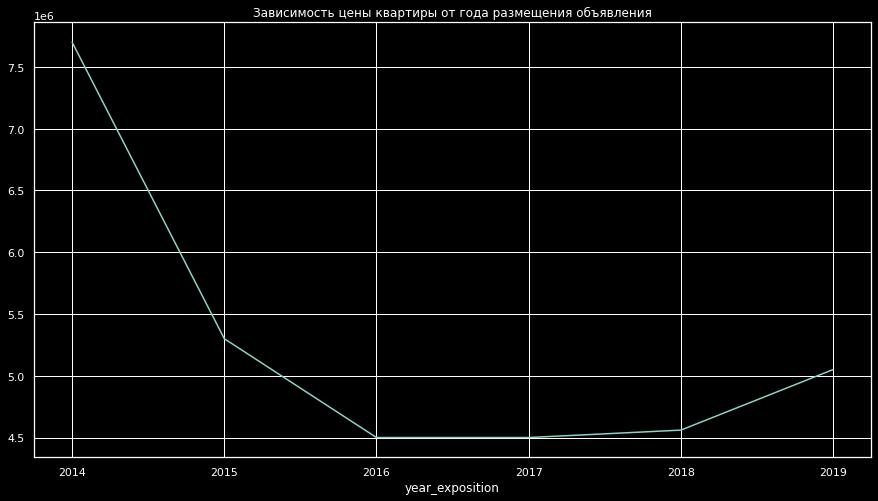

In [81]:
data.groupby('year_exposition')['last_price'].median().plot()
plt.title('Зависимость цены квартиры от года размещения объявления')

По трем вышеприведенным графикам видно, что в выходные, в июне кваритиры дешевые (продавать не выгодно). С 2014 года стоимость квартир значительно снизилась. Похоже на влияние политической обстановки в мире и в России на финансовый рынок (небезызвестные события присоединения дополнительных территорий к России).

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Тут нужно посмотреть на количество объявлений, а зависимость цены мы изучим позже)
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Для остальных графиков ты корректно подбираешь основные диапазоны, а также верно читаешь сами графики! Отдельный плюс за то, что ты подписываешь графики
</div>

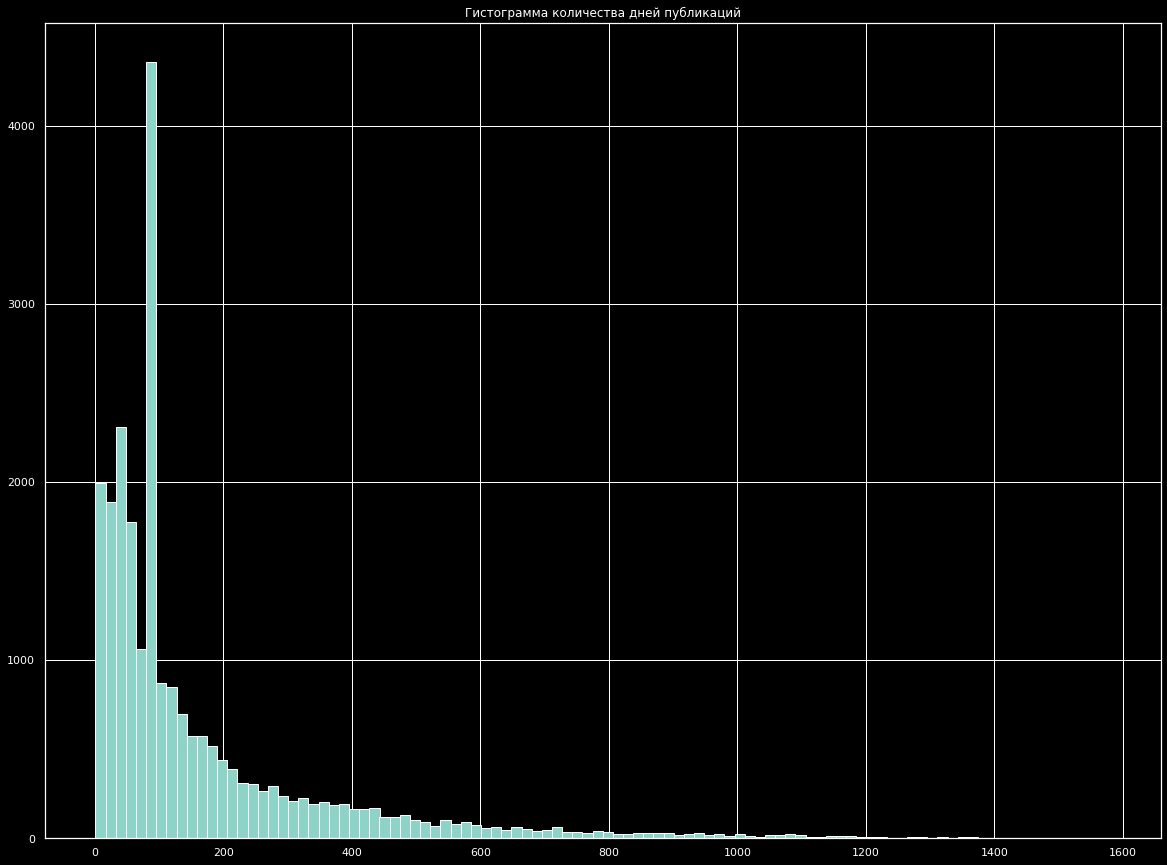

In [82]:
data['days_exposition'].hist(bins=100, figsize=(20, 15))
plt.title('Гистограмма количества дней публикаций')
plt.show()

In [83]:
data['days_exposition'].describe()

count    23571.000000
mean       169.044758
std        206.207714
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

Судя по этим данным, достаточно быстрой продажей можно считать до 95 дней. А вот все что свыше примерно 200 дней это уже долгая продажа.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен! Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

In [84]:
total_area_stat = data.pivot_table(index='total_area', values='last_price', aggfunc='median').reset_index()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


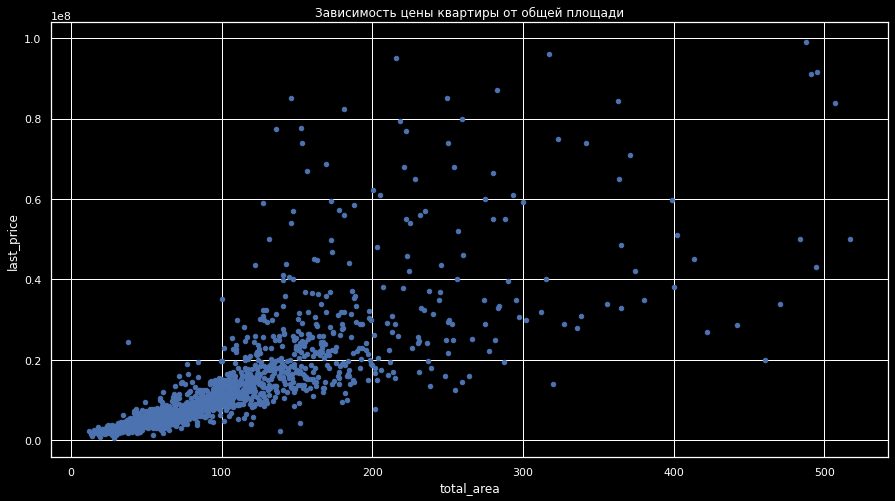

In [85]:
total_area_stat.plot(x='total_area', y='last_price', kind='scatter', grid=True)
plt.title('Зависимость цены квартиры от общей площади')
plt.show()

Диаграмма рассеяния показывает, что чем больше в квартире метров, тем выше цена. Посмотрим на корреляцию.

In [86]:
total_area_stat['total_area'].corr(total_area_stat['last_price'])

0.8063304312391909

Достаточно сильная положительная корреляция подтверждает предположение сделанное выше.

In [87]:
living_area_stat = data.pivot_table(index='living_area', values='last_price', aggfunc='median').reset_index()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


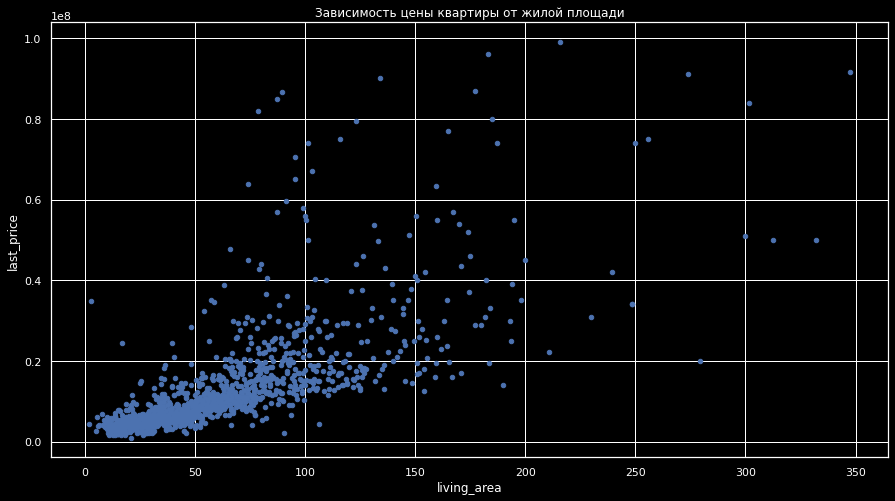

In [88]:
living_area_stat.plot(x='living_area', y='last_price', kind='scatter', grid=True)
plt.title('Зависимость цены квартиры от жилой площади')
plt.show()

In [89]:
living_area_stat['living_area'].corr(living_area_stat['last_price'])

0.7576346856698777

Также стоимость квартиры достаточно сильно зависит от жилой площади, но в меньшей степени, чем от общей площади.

In [90]:
kitchen_area_stat = data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').reset_index()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


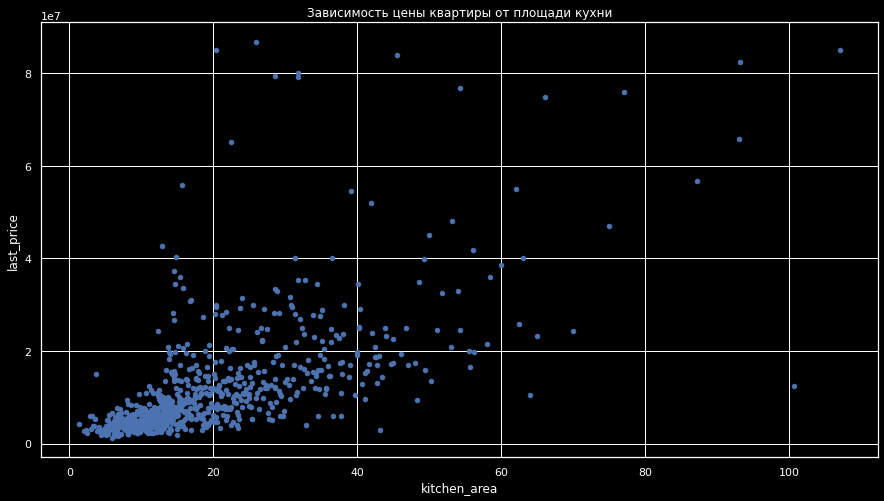

In [91]:
kitchen_area_stat.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True)
plt.title('Зависимость цены квартиры от площади кухни')
plt.show()

In [92]:
kitchen_area_stat['kitchen_area'].corr(kitchen_area_stat['last_price'])

0.6770629262658345

Зависимость стоимости квартиры от площади кухни еще меньше, чем от общей площади.

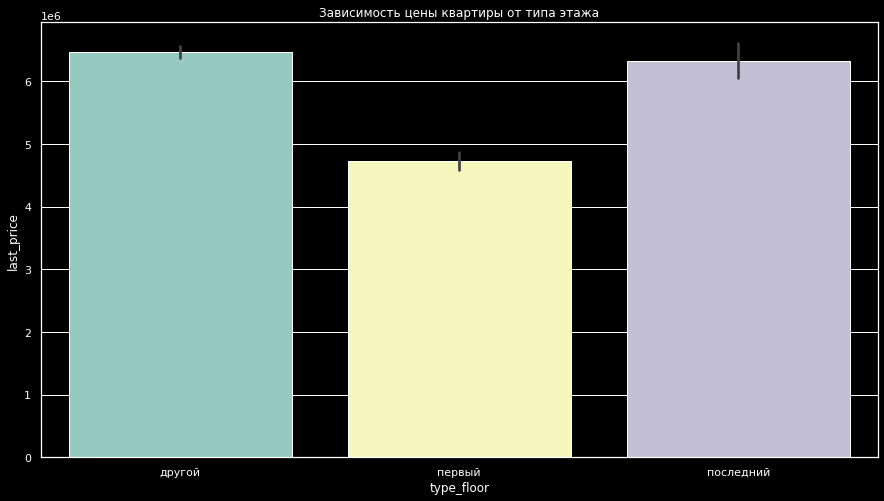

In [93]:
sns.barplot(x='type_floor', y='last_price', data=data)
plt.title('Зависимость цены квартиры от типа этажа')
plt.show()

Квартиры на первом этаже стоят значительно дешевле. Последний и другой тип этажей примерно одинаковы по стоимости.

In [94]:
rooms_stat = data.pivot_table(index='rooms', values='last_price', aggfunc='median').reset_index()

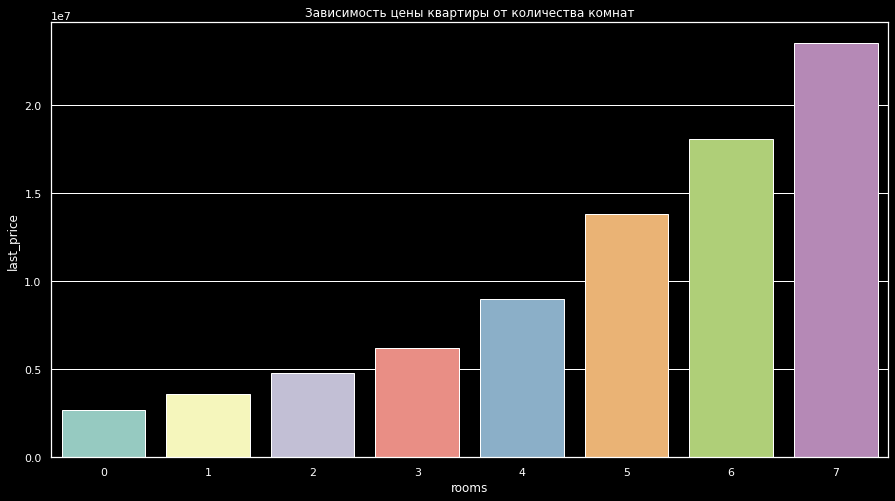

In [95]:
sns.barplot(x='rooms', y='last_price', data=rooms_stat)
plt.title('Зависимость цены квартиры от количества комнат')
plt.show()

In [96]:
rooms_stat['rooms'].corr(rooms_stat['last_price'])

0.9578519479164574

Прямая зависимость стоимости квартиры от количества комнат.

In [97]:
type_floor_stat = data.pivot_table(index='type_floor', values='last_price'
                                   , aggfunc='median').sort_values(by='last_price', ascending='False').reset_index()
type_floor_stat

,type_floor,last_price
0,первый,3900000.0
1,последний,4300000.0
2,другой,4840000.0


Квартиры на первом этаже стоят дешевле, чем на последнем и других этажах, следом по стоимости идут последние этажи и дороже всего стоят квартиры не на последнем и не на первом этажах. Это обычная практика в России. Шум улицы, большая проходимость на первых этажах, возможный холод в квартирах крайних этажей.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Зависимость цены изучена верно! Ещё тут можно использовать для визуализации pairplot из библиотеки seaborn 
    
    https://seaborn.pydata.org/generated/seaborn.pairplot.html
</div>

In [98]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург      15644
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             397
Пушкин                 369
Колпино                337
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 235
Name: locality_name, dtype: int64

In [99]:
data.groupby('locality_name')['price_per_square_meter'].agg(['mean', 'count']).sort_values('count', ascending=False).head(10)

,mean,count
locality_name,,
Санкт-Петербург,113596.318032,15644
посёлок Мурино,85752.188506,522
посёлок Шушары,78677.363636,440
Всеволожск,68719.322166,397
Пушкин,103125.818157,369
Колпино,75333.298516,337
посёлок Парголово,90175.915291,327
Гатчина,68746.147231,307
деревня Кудрово,92473.546488,299


In [100]:
data.groupby('locality_name')['price_per_square_meter'].agg(['mean', 'count']).sort_values('mean', ascending=False).tail(10)

,mean,count
locality_name,,
поселок городского типа Ефимовский,16050.1,3
поселок Почап,16037.7,1
деревня Ям-Тесово,15094.3,1
посёлок станции Свирь,15000.0,1
поселок станции Лужайка,15000.0,1
поселок Житково,14956.3,2
деревня Сижно,13709.7,1
деревня Выскатка,13207.5,1
поселок Тёсово-4,12931.0,1


Самые дорогие квадратные метры (как ни странно) в Санкт-Петербурге. Да и количество объявлений больше всего. Самы дешевый квадратный метр в деревне Малая Романовка.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Тут нужно выделить населённые пункты с максимальной и минимальной ценой из топ10 по количеству объявлений, а не из всех данных 
</div>

/tmp/ipykernel_97/2717198929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spb['mean_price_for_km'] = data_spb_mean / data_spb['city_centers_nearest_km'] #средняя цена для каждого км
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<AxesSubplot:xlabel='city_centers_nearest_km', ylabel='mean_price_for_km'>

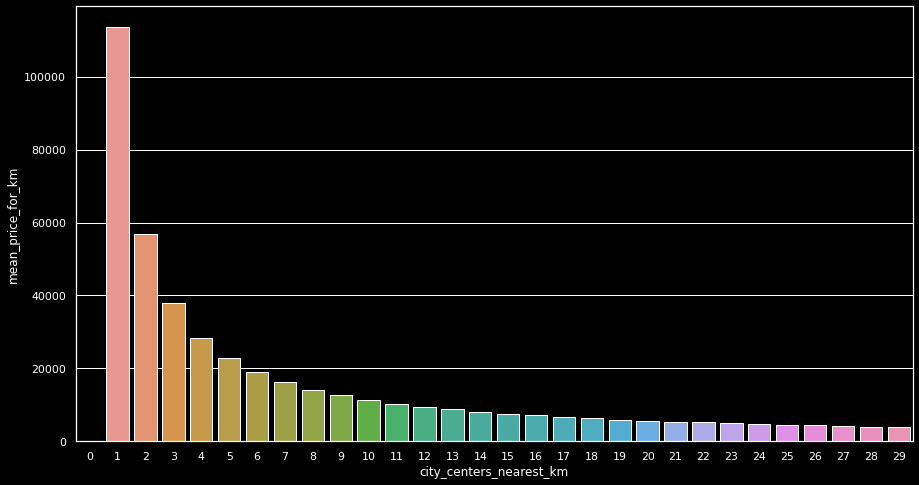

In [101]:
data_spb = data.query('locality_name == "Санкт-Петербург"') #выбираем только квартиры в спб
data_spb_mean = data_spb['price_per_square_meter'].mean() #средняя цена кв.м
data_spb['mean_price_for_km'] = data_spb_mean / data_spb['city_centers_nearest_km'] #средняя цена для каждого км
sns.barplot(x='city_centers_nearest_km', y='mean_price_for_km', data=data_spb)

In [102]:
data_spb.head()

,total_images,last_price,total_area,price_per_square_meter,first_day_exposition,day_of_week_exposition,month_exposition,year_exposition,rooms,ceiling_height,...,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,type_floor,city_centers_nearest_km,mean_price_for_km
0,20,13000000.0,108.0,120370.4,2019-03-07,3,3,2019,3,2.70,...,18863.0,16028.0,1.0,482.0,2.0,755.0,95,другой,16,7099.769877
2,10,5196000.0,56.0,92785.7,2015-08-20,3,8,2015,2,2.65,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558,другой,14,8114.022717
3,0,64900000.0,159.0,408176.1,2015-07-24,4,7,2015,3,2.65,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424,другой,7,16228.045433
4,2,10000000.0,100.0,100000.0,2018-06-19,1,6,2018,2,3.03,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121,другой,8,14199.539754
7,5,7915000.0,71.6,110544.7,2019-04-18,3,4,2019,2,2.65,...,23982.0,11634.0,0.0,455.0,0.0,502.0,95,другой,12,9466.359836


В соответствии со столбчатой диаграммой видим, что стоимость кваритир в Санкт-Петербурге напрямую зависит от растояния до центра города. Чем дальше, тем дешевле.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Верно!
</div>

### Общий вывод

В ходе исследования были выполнены следующие этапы:

1 Предобработка данных.
    На данном этапе были обнаружны пропуски в данных, по возможности они были заполнены. Был изменен формат данных для               возможности последующей обработки.

2 Расчеты и добавление результатов.
    Расчитаны и добавлены в таблицу данные, которых не хватало для анализа.

3 Исследовательский анализ.
    Определны факторы флияющие на стоиомсть квартры - площадь квартиры, число комнат, этаж, удалённость от центра, дата             размещения объявления, проведено сравнение всех представленных данных с выборкой данных по центральному району
    Санкт-Петербурга.
    
    В итоге можно делать вывод о зависимости стоимости квартир от следдующих факторов:
    - площади. Почти прямая зависимость от общей площади, чем больше площадь, тем больше стоимость, что подтверждает достаточно
    сильная положительная корреляция. От жилой площади и площади кухни зависимость стоимости квартиры меньше;
    - количества комнат. Чем больше комнат, тем выше цена квартиры;
    - этажа, на котором расположена квартира (первый, последний, другой). Последний и другие этажи стоят практически одинаково,
    в то время как первый почти на 25% дешевле;
    - даты размещения объявления. В июне и в выходные квартиры дешевле. С 2014 года стоимость квартир значительно снизилась.
    Похоже на влияние политической обстановки в мире и в России на финансовый рынок. к 2019 году наблюдается небольшой рост.
    
    Самое большое количество обьявлений в Санкт-Петербурге и чем дальше от центра, тем дешевле (чего и следовало ожидать).

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>После всех внесённых правок, обязательно перепроверь общий вывод и промежуточные выводы и поправь их по необходимости
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Ты хорошо потрудился, большая часть работы сделана, но остаётся внести следующие правки:
<br>- не заполнять пропуски в столбцах с картографическими данными
<br>- не заполнять пропуски в столбце days_exposition
<br>- добавить графики в задании 4.1
<br>- корректно изучить топ10 населённых пунктов с наибольшим числом объявлений
<br>- поправить выводы там, где это необходимо
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод